In [81]:
#preparing the tools
# regular Exploratory Data Analysis (EDA) and plotting libraries
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

#to make our plots appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [82]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

#Exploratory Data Analysis
1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [83]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [84]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [85]:
df['target'].value_counts()
#165 have the disease 138 do not

1    165
0    138
Name: target, dtype: int64

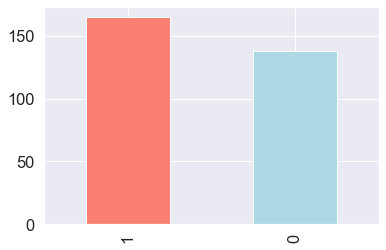

In [86]:
df['target'].value_counts().plot(kind="bar", 
                                 color=["salmon", "lightblue"]);

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [88]:
#check for missng values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [89]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Heart Disease Frequency according to Gender
If you want to compare two columns to each other, you can use the function pd.crosstab(column_1, column_2).

This is helpful if you want to start gaining an intuition about how your independent variables interact with your dependent variables.

Let's compare our target column with the sex column.

Remember from our data dictionary, for the target column, 1 = heart disease present, 0 = no heart disease. And for sex, 1 = male, 0 = femal

In [90]:
df.sex.value_counts()
# 1= male
# 2= female

1    207
0     96
Name: sex, dtype: int64

In [91]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex,)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

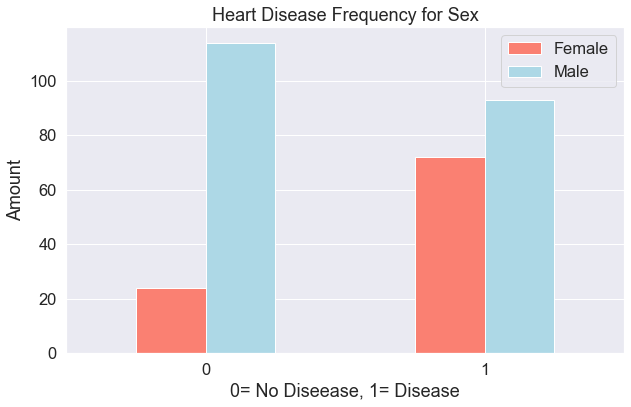

In [92]:
#create a plot of crosstab
pd.crosstab(df.target, df.sex,).plot(kind='bar', 
                                     figsize=(10,6) ,
                                     color=['salmon','lightblue'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0= No Diseease, 1= Disease')
plt.ylabel('Amount' )
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)

In [93]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [94]:
df['chol'].value_counts()
#length shows the number of different values in a column for the chol colum, there are 152 different values 
# and as such the variations are too much to plot on a bar chat

234    6
204    6
197    6
269    5
212    5
      ..
278    1
281    1
284    1
290    1
564    1
Name: chol, Length: 152, dtype: int64

##  Age vs Max Heart Rate (thalach) vs Target

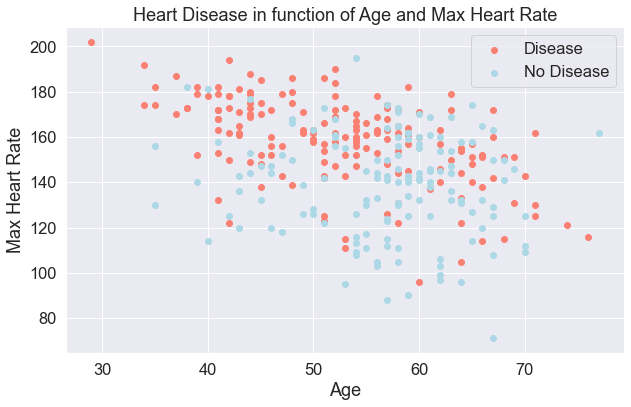

In [95]:
#create another figure
plt.figure(figsize=(10,6))

#with heart disease
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
           color="salmon")

#withouth heart disease
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
           color="lightblue");
# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

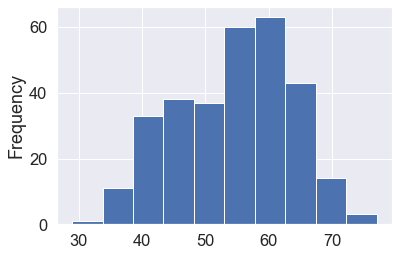

In [96]:
#check the distribution of the age column with the histogram
df.age.plot.hist();

## Heart Disease Frequency per Chest Pain Type¶

 0: Typical angina: chest pain related decrease blood supply to the heart
 
 1: Atypical angina: chest pain not related to heart
 
 2: Non-anginal pain: typically esophageal spasms (non heart related)
 
 3: Asymptomatic: chest pain not showing signs of disease

In [97]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


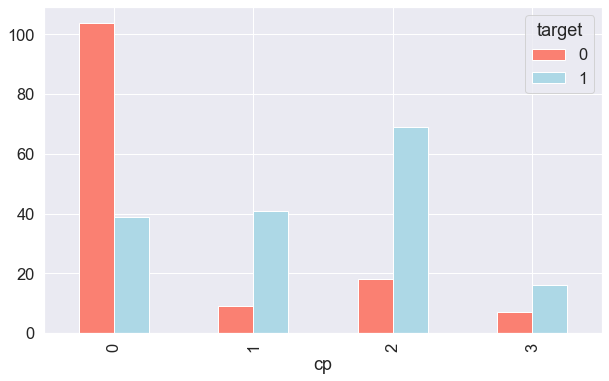

In [98]:
pd.crosstab(df.cp,df.target).plot(kind='bar',
                                   figsize=(10,6),
                                   color=["salmon","lightblue"]);
                                  

In [99]:
#make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


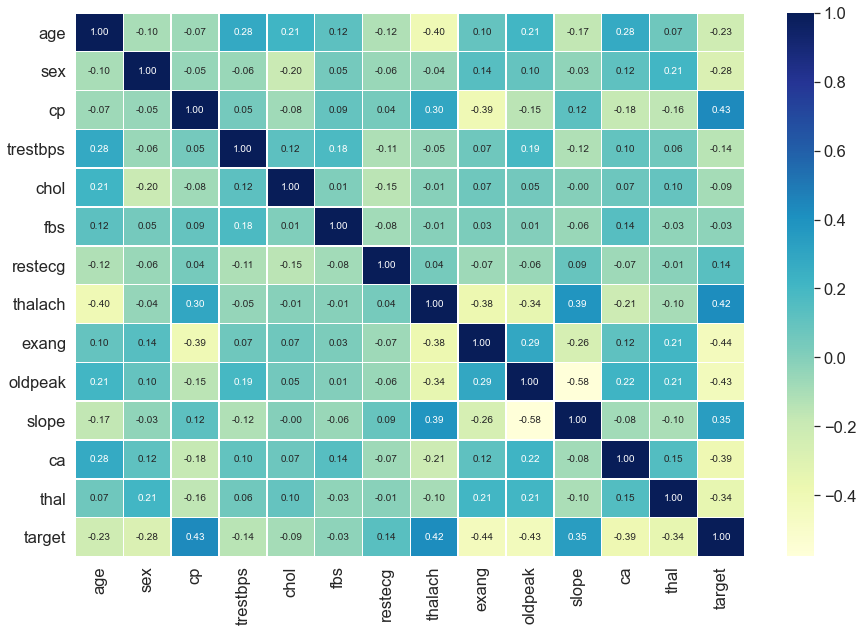

In [100]:
#making our correlation more visisble with seaborn sea map
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth= 0.5,
                fmt='.2f',
                cmap="YlGnBu")

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

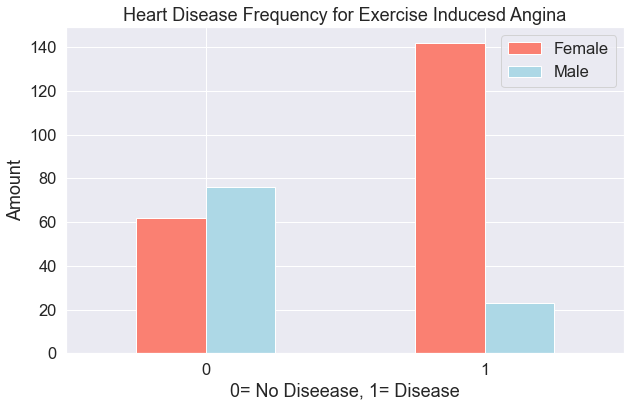

In [101]:
pd.crosstab(df.target, df.exang).plot(kind='bar', 
                                     figsize=(10,6) ,
                                     color=['salmon','lightblue'])
plt.title('Heart Disease Frequency for Exercise Inducesd Angina')
plt.xlabel('0= No Diseease, 1= Disease')
plt.ylabel('Amount' )
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)

## Modelling

In [102]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [103]:
#split data into x and y
x= df.drop('target', axis=1)
y= df['target']

In [104]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [105]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [106]:
#split data into train and test
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                test_size=0.2)


In [107]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [108]:
y_train,len(y_train)


(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

# After spliting data build a machine learning model, sampling three different models
1. Logistic regression
2. k Neighbors classifiers
3. Random Forest Classifiers

In [109]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores


In [110]:
model_scores = fit_and_score(models=models,
                            x_train=x_train,
                            x_test= x_test,
                            y_train= y_train,
                            y_test= y_test)
model_scores

C:\Users\LIONEL\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

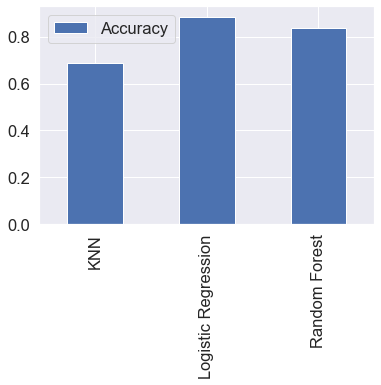

In [111]:
model_compare = pd.DataFrame(model_scores,index=['Accuracy'])
model_compare.T.plot.bar();
 

##  Hyperparameter Tuning by Hand

In [112]:
#tuning KNN bY hand

train_scores = []
test_scores =[]
#list of different values of n_neighbors
neighbors = range(1,21)

#setup KNN instance
knn = KNeighborsClassifier()

#loop through different neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit the algorithm
    knn.fit(x_train, y_train)
    
    #update the training score list
    train_scores.append(knn.score(x_train ,y_train))
    
    #update the test scores list
    test_scores.append(knn.score(x_test,y_test))

In [113]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [114]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data:75.409836


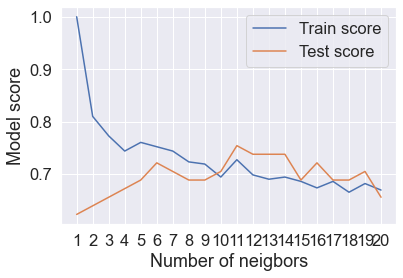

In [115]:
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label='Test score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neigbors')
plt.ylabel('Model score')
plt.legend()

print(f'Maximum KNN score on the test data:{max(test_scores)*100:2f}')

## Hyperparameter Tuning with RandomizedSearchCV

#we will be tuning
1. Logistic Regression()

2. Random ForestClassifier()

In [116]:
# create a grid for logistic regression
log_reg_grid = {'C': np.logspace (-4,4,20),
               "solver":["liblinear"]}
#create hyperparameter grid for RandomSearchClassifier
rf_grid = {'n_estimators':np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)
          }
#number 10 to number 1000, 50 numbers apart


In [117]:
# hyperparameter tuning of  logistic regression with RandomizedSearchCV 
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression()
                               , param_distributions=log_reg_grid,
                               cv=5,
                                n_iter=20,
                               verbose=True )
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.3s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [118]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [119]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [120]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier()
                               , param_distributions=rf_grid,
                               cv=5,
                                n_iter=20,
                               verbose=True )
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  8.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [121]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [122]:
rs_rf.score(x_test,y_test)

0.8688524590163934

## Hyperparameter Tuning With GridSearchCV


# since logistic regression is the best performing model of our last tuning , we would experiment on improving the score with GridSearchCV

In [123]:
log_reg_grid = {'C': np.logspace (-4,4,30),
               "solver":["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression()
                               , param_grid=log_reg_grid,
                               cv=5,
                               verbose=True )
gs_log_reg.fit(x_train, y_train)



Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   11.8s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [124]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [125]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

##Evaluating our tuned machine learning classifier beyond accuracy


ROC curve and AOC curve
Confusin matrix
Classification report
Precision
Recall
F1 score

 make predictions to evaluate our model ##

In [126]:
y_preds = gs_log_reg.predict(x_test)

In [127]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [128]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

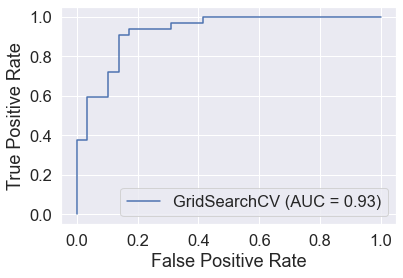

In [129]:
  #plot roc curve and calculate auc metric
plot_roc_curve(gs_log_reg, x_test, y_test)

In [130]:
#confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


In [131]:
sns

<module 'seaborn' from 'C:\\Users\\LIONEL\\Desktop\\sample_project_1\\env\\lib\\site-packages\\seaborn\\__init__.py'>

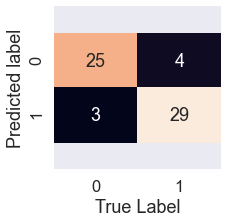

In [132]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    plot a confusion matrix using seaborn's heatmap
    """ 
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom +0.5, top - 0.5)

   
plot_conf_mat(y_test, y_preds)
    

In [133]:
#Classification report and cross validation, recall and f1 score

In [134]:
print(classification_report(y_preds, y_test))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.91      0.88      0.89        33

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



# calculate evaluation  matricx using cross validation (cross_val_score) : precision, f1 score, recall

In [135]:
#check best hyperparameters to use for cross validation
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [136]:
#create a new classifier with the best parameter
clf = LogisticRegression(C = 0.20433597178569418, solver = 'liblinear')

In [137]:
#cross validated accuracy

cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring = "accuracy"
                         
)
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [138]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [139]:
#cross validated precision
cv_precision = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring = "precision"
                         
)
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [140]:
#cross validated recalln
cv_recall = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring = "recall"
                         
)
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [141]:
#cross validated f1_score
cv_f1 = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring = "f1"
                         
)
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

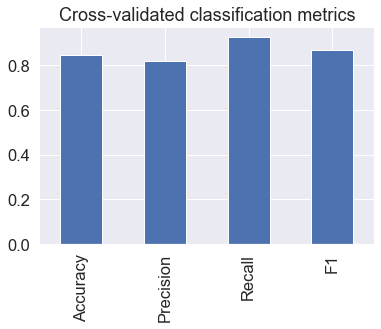

In [142]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend= False);                                    

#Feature importance

This analysizes which of the features is the most important in processign the data.

The important features can be detected with different methods depending on the machine learning model

Finding the feature importance of our logistic regression model we would be using the "(MODEL NAME)"

In [143]:
clf = LogisticRegression(C= 0.20433597178569418,
                       solver ="liblinear" )
clf.fit(x_train,y_train);

In [144]:
clf.coef_

array([[ 0.00316728, -0.86044635,  0.66067048, -0.01156993, -0.00166374,
         0.04386112,  0.31275834,  0.02459361, -0.60413071, -0.56862814,
         0.45051626, -0.63609889, -0.67663372]])

In [145]:
#Match coefficient(coef) of features to their corresponding columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672782921965824,
 'sex': -0.8604463545603078,
 'cp': 0.6606704813545083,
 'trestbps': -0.011569931686524986,
 'chol': -0.001663743615316917,
 'fbs': 0.043861119186527575,
 'restecg': 0.3127583405809992,
 'thalach': 0.024593612169467042,
 'exang': -0.6041307069682633,
 'oldpeak': -0.5686281432757914,
 'slope': 0.45051625714744153,
 'ca': -0.6360988914321564,
 'thal': -0.6766337224000031}

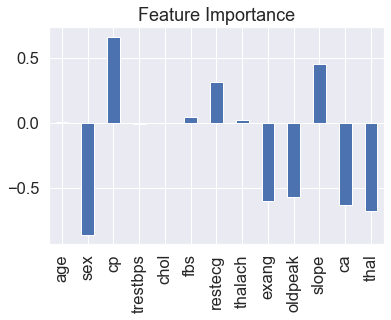

In [146]:
#Another way to visualise a feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title = "Feature Importance", legend =False);

In [147]:
pd.crosstab(df["slope"], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment 
        
        
        *0: Upsloping: better heart rate with excercise (uncommon) 
        *1: Flatsloping: minimal change (typical healthy heart) 
        *2: Downslopins: signs of unhealthy heart

## Experimentation

At this stage, if you have not gotten the necessary accuracy, you should either addd more data to improve the machine learning or better the current model or try another model like CatBoost and XGBoost.

If the model is good enough(you have hit the evaluation metric), then you should share it with the client or your friends.
